# Importing and Looking at the Data

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# insert your Google drive flags.csv file path here
df_flags = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Flags/Data/flags.csv')

In [3]:
df_flags.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red


In [4]:
df_flags.tail()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,red,green,blue,gold,white,black,orange,mainhue,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
189,Western-Samoa,6,3,3,0,1,1,0,0,3,1,0,1,0,1,0,0,red,0,0,0,1,5,0,0,0,0,0,blue,red
190,Yugoslavia,3,1,256,22,6,6,0,3,4,1,0,1,1,1,0,0,red,0,0,0,0,1,0,0,0,0,0,blue,red
191,Zaire,4,2,905,28,10,5,0,0,4,1,1,0,1,0,0,1,green,1,0,0,0,0,0,0,1,1,0,green,green
192,Zambia,4,2,753,6,10,5,3,0,4,1,1,0,0,0,1,1,green,0,0,0,0,0,0,0,0,1,0,green,brown
193,Zimbabwe,4,2,391,8,10,5,0,7,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,1,1,1,0,green,green


# Analysing who has Green, Yellow, White and Blue Flag Colors

In [5]:
#divide the colors
green = df_flags['green']
yellow = df_flags['gold']
blue = df_flags['blue']
white = df_flags['white']

In [6]:
sum = green + yellow + blue + white

In [7]:
#generate a	boolean list	with true for the ones who have all 4 colors
have_all_colors = (sum==4)

In [8]:
# print the country names with the 4 colors

print('Countries with all 4 colors')
print(df_flags[have_all_colors.values]['name'])

Countries with all 4 colors
17                       Belize
19                      Bermuda
23                       Brazil
24         British-Virgin-Isles
26                     Bulgaria
33               Cayman-Islands
34     Central-African-Republic
48                     Dominica
56           Falklands-Malvinas
57                         Fiji
71                         Guam
78                    Hong-Kong
116                  Montserrat
135                     Parguay
139                    Portugal
142                     Romania
151             Soloman-Islands
158                   St-Helena
161                  St-Vincent
176         Turks-Cocos-Islands
182             US-Virgin-Isles
187                   Venezuela
Name: name, dtype: object


# Exploratory Analysis

We will be analysing the follwings:

- Obtaining the basic properties of all attributes.
- Generating a frequency table from a selected dataset. 
- Generating a bar chart for a set of selected attributes.

## Obtaining the basic properties of all attributes.

In [9]:
i = 0
for	c	in df_flags.columns:	
  i	+=1 # i = i + 1
  attribute	=	df_flags[c] #Atribute
  attribute_dtype	=	attribute.dtype	#dTypes		
  attribute_dom_size	=		attribute.unique().size #Domain Size
  attribute_is_null = any(attribute.isnull()) #Has null values?
  if (attribute_dom_size <8): 
    print('('+str(i)+') attribute:',c, '\t',
          "dtypes:", attribute_dtype, '\t',
          "dnulls:", attribute_is_null, '\t',
          "Domain:", attribute.unique())
  else:
    if (attribute_dtype == 'object'):
      print('('+str(i)+') attribute:',c, '\t',
          "dtypes:", attribute_dtype, '\t',
          "dnulls:", attribute_is_null, '\t',
          "Domain (First Elements):", attribute.unique()[0:8])
    else:
      print('('+str(i)+') attribute:',c, '\t',
            "dtypes:", attribute_dtype, '\t',
            "nulls:", attribute_is_null, '\t',
            "Min:", attribute.min(),'\t',
            "Max:", attribute.max(), '\t',
            "Average", round(attribute.mean(),2), '\t',
            "Std:", round(attribute.std(),2))

(1) attribute: name 	 dtypes: object 	 dnulls: False 	 Domain (First Elements): ['Afghanistan' 'Albania' 'Algeria' 'American-Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua-Barbuda']
(2) attribute: landmass 	 dtypes: int64 	 dnulls: False 	 Domain: [5 3 4 6 1 2]
(3) attribute: zone 	 dtypes: int64 	 dnulls: False 	 Domain: [1 3 2 4]
(4) attribute: area 	 dtypes: int64 	 nulls: False 	 Min: 0 	 Max: 22402 	 Average 700.05 	 Std: 2170.93
(5) attribute: population 	 dtypes: int64 	 nulls: False 	 Min: 0 	 Max: 1008 	 Average 23.27 	 Std: 91.93
(6) attribute: language 	 dtypes: int64 	 nulls: False 	 Min: 1 	 Max: 10 	 Average 5.34 	 Std: 3.5
(7) attribute: religion 	 dtypes: int64 	 nulls: False 	 Min: 0 	 Max: 7 	 Average 2.19 	 Std: 2.06
(8) attribute: bars 	 dtypes: int64 	 dnulls: False 	 Domain: [0 2 3 1 5]
(9) attribute: stripes 	 dtypes: int64 	 nulls: False 	 Min: 0 	 Max: 14 	 Average 1.55 	 Std: 2.33
(10) attribute: colours 	 dtypes: int64 	 nulls: False 	 Min: 1 	 Max: 8 	 Avera

## Generating a frequency table from a selected dataset.

In [10]:
#Creating a generic empty DF inside df_colors
df_colors = pd.DataFrame()

for c in df_flags.columns:
  if c in ['red','green','blue','gold','white','black','orange']:
    df_colors[c]=df_flags[c].value_counts()

print(df_colors)

   red  green  blue  gold  white  black  orange
1  153     91    99    91    146     52      26
0   41    103    95   103     48    142     168


## Generating a bar chart for a set of selected attributes.

In [11]:
list_colors = [
               ['red','beige'],
               ['green', 'beige'],
               ['blue','beige'],
               ['gold','beige'],
               ['whitesmoke','beige'],
               ['black','beige'],
               ['orange','beige']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f53bf08f4e0>,
      dtype=object)

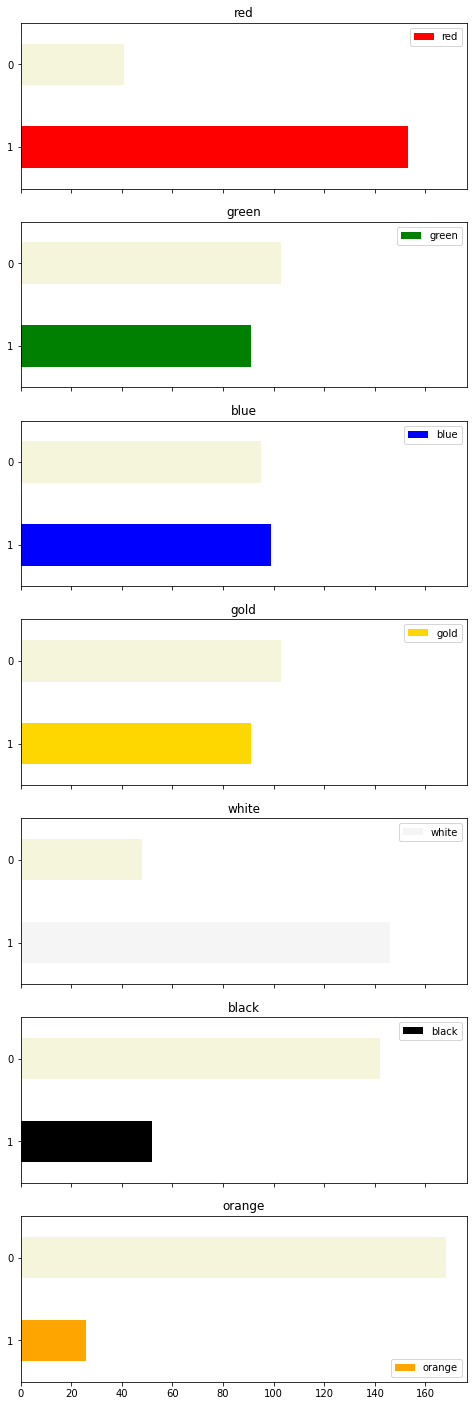

In [12]:
df_colors.plot(kind = 'barh', subplots = True, figsize= (8,25), color = list_colors)

# Combining Two Datasets

In this session we will be combining the Flag Dataset with a countries of the world kaggle dataset. 

https://www.kaggle.com/fernandol/countries-of-the-world

The following Analysis will be made:

- Verify which countries are in both DF's. 
- Verify which countries are only at flags.csv
- Verify which countries are only at countries.csv

In [13]:
df_countries = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Flags/Data/countries.csv')

In [14]:
df_countries.head()

,country,pop_country,area_country
0,Afghanistan,31056997,647500
1,Albania,3581655,28748
2,Algeria,32930091,2381740
3,American-Samoa,57794,199
4,Andorra,71201,468


In [15]:
df_countries.shape

(227, 3)

In [16]:
# Which countries are in both Data Frames?

both = pd.merge(df_flags,df_countries, how= 'inner', left_on='name', right_on='country')
print(both)

               name  landmass  zone  ...         country  pop_country  area_country
0       Afghanistan         5     1  ...     Afghanistan     31056997        647500
1           Albania         3     1  ...         Albania      3581655         28748
2           Algeria         4     1  ...         Algeria     32930091       2381740
3    American-Samoa         6     3  ...  American-Samoa        57794           199
4           Andorra         3     1  ...         Andorra        71201           468
..              ...       ...   ...  ...             ...          ...           ...
172         Vanuatu         6     2  ...         Vanuatu       208869         12200
173       Venezuela         2     4  ...       Venezuela     25730435        912050
174         Vietnam         5     1  ...         Vietnam     84402966        329560
175          Zambia         4     2  ...          Zambia     11502010        752614
176        Zimbabwe         4     2  ...        Zimbabwe     12236805       

In [17]:
#Which countrie are only at flags.csv?

flags_only = pd.merge( df_flags,df_countries, how='left', left_on='name', right_on='country' )
flags_only = flags_only[pd.isnull(flags_only['country']) == True] #brings the null lines from countries

print(flags_only)

                   name  landmass  zone  ...  country  pop_country  area_country
9             Argentine         2     3  ...      NaN          NaN           NaN
56   Falklands-Malvinas         2     3  ...      NaN          NaN           NaN
65          Germany-FRG         3     1  ...      NaN          NaN           NaN
88          Ivory-Coast         4     4  ...      NaN          NaN           NaN
92            Kampuchea         5     1  ...      NaN          NaN           NaN
103            Malagasy         4     2  ...      NaN          NaN           NaN
109            Marianas         6     1  ...      NaN          NaN           NaN
127                Niue         6     3  ...      NaN          NaN           NaN
135             Parguay         2     3  ...      NaN          NaN           NaN
155         South-Yemen         5     1  ...      NaN          NaN           NaN
163             Surinam         2     4  ...      NaN          NaN           NaN
182     US-Virgin-Isles     

In [18]:
# Which countries are only at countries.csv?

countries_only = pd.merge( df_flags,df_countries, how='right', left_on='name', right_on='country' )
countries_only = countries_only[pd.isnull(countries_only['name']) == True] # brings the null lines from flags


print(countries_only)

    name  landmass  zone  ...              country  pop_country  area_country
9    NaN       NaN   NaN  ...              Armenia      2976372         29800
10   NaN       NaN   NaN  ...                Aruba        71891           193
13   NaN       NaN   NaN  ...           Azerbaijan      7961619         86600
18   NaN       NaN   NaN  ...              Belarus     10293011        207600
25   NaN       NaN   NaN  ...   Bosnia-Herzegovina      4498976         51129
34   NaN       NaN   NaN  ...             Cambodia     13881427        181040
46   NaN       NaN   NaN  ...  Congo-Repub. of the      3702314        342000
49   NaN       NaN   NaN  ...        Cote d'Ivoire     17654843        322460
50   NaN       NaN   NaN  ...              Croatia      4494749         56542
58   NaN       NaN   NaN  ...           East Timor      1062777         15007
63   NaN       NaN   NaN  ...              Eritrea      4786994        121320
64   NaN       NaN   NaN  ...              Estonia      1324333 

# Cleaning and Transforming the DataFrames

We can separate the attributes into 4 different groups:

1. Catogirical Binaries;
2. Categorical non Binaries;
3. Numerical Continuous;
4. Numerical Discrete;

In this secion we are going to transform the attibutes with the intent of standardizing the Flags Dataset.

The idea here is to prepare the base, so we can use a **Classification Algorithm** next. 

In [19]:
#Converting non binary attributes at group 2 into binary ones. (Categorical Non Binaries -> Categorical Binaries)

for c in df_flags.columns:
  if c in ['landmass', 'zone', 'language', 'religion', 'mainhue', 'topleft', 'botright']:
    dummies = pd.get_dummies(df_flags[c], prefix= c)
    df_flags = df_flags.join(dummies) 

In [20]:
# Normalizing groups 3 and 4 attributes (Numerical Discrete and Continuous -> Range of 0 to 1.0)]

for c in df_flags:
  if c in ['area','population','bars', 'stripes', 'colours', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars']:
    c_max = max(df_flags[c])
    c_min = min(df_flags[c])
    df_flags[c] = (df_flags[c] - c_min) / (c_max - c_min)

In [21]:
# Removing attributes we aren't going to use

df_flags = df_flags.drop(columns=['name', 'landmass', 'zone', 'language', 'religion', 'mainhue', 'topleft', 'botright'])

In [22]:
# Print the final setups of Flags

df_flags.head()

,area,population,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,landmass_1,landmass_2,landmass_3,landmass_4,landmass_5,landmass_6,zone_1,zone_2,zone_3,zone_4,language_1,language_2,language_3,language_4,language_5,language_6,language_7,language_8,language_9,language_10,religion_0,religion_1,religion_2,religion_3,religion_4,religion_5,religion_6,religion_7,mainhue_black,mainhue_blue,mainhue_brown,mainhue_gold,mainhue_green,mainhue_orange,mainhue_red,mainhue_white,topleft_black,topleft_blue,topleft_gold,topleft_green,topleft_orange,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,0.028926,0.015873,0.0,0.214286,0.571429,1,1,0,1,1,1,0,0.0,0.0,0.0,0.0,0.02,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.001295,0.002976,0.0,0.000000,0.285714,1,0,0,1,0,1,0,0.0,0.0,0.0,0.0,0.02,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0.106598,0.019841,0.4,0.000000,0.285714,1,1,0,0,1,0,0,0.0,0.0,0.0,0.0,0.02,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0.000000,0.000000,0.0,0.000000,0.571429,1,0,1,1,1,0,1,0.0,0.0,0.0,0.0,0.00,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.000000,0.000000,0.6,0.000000,0.285714,1,0,1,1,0,0,0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
df_flags.tail()

,area,population,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,landmass_1,landmass_2,landmass_3,landmass_4,landmass_5,landmass_6,zone_1,zone_2,zone_3,zone_4,language_1,language_2,language_3,language_4,language_5,language_6,language_7,language_8,language_9,language_10,religion_0,religion_1,religion_2,religion_3,religion_4,religion_5,religion_6,religion_7,mainhue_black,mainhue_blue,mainhue_brown,mainhue_gold,mainhue_green,mainhue_orange,mainhue_red,mainhue_white,topleft_black,topleft_blue,topleft_gold,topleft_green,topleft_orange,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
189,0.000134,0.000000,0.0,0.000000,0.285714,1,0,1,0,1,0,0,0.00,0.0,0.0,0.25,0.10,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
190,0.011428,0.021825,0.0,0.214286,0.428571,1,0,1,1,1,0,0,0.00,0.0,0.0,0.00,0.02,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
191,0.040398,0.027778,0.0,0.000000,0.428571,1,1,0,1,0,0,1,0.25,0.0,0.0,0.00,0.00,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
192,0.033613,0.005952,0.6,0.000000,0.428571,1,1,0,0,0,1,1,0.00,0.0,0.0,0.00,0.00,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
193,0.017454,0.007937,0.0,0.500000,0.571429,1,1,0,1,1,1,0,0.00,0.0,0.0,0.00,0.02,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


In [24]:
# Saves the Dataset to a .csv file
# Don't forget to change your path here

df_flags.to_csv('/content/drive/MyDrive/Colab Notebooks/Flags/Treated Flags/Treated_flags.csv', sep=',', index = False)

# A little bit of Machine Learning

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
df_flags_treated = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Flags/Treated Flags/Treated_flags.csv')

In [27]:
df_flags_treated.head()

,area,population,bars,stripes,colours,red,green,blue,gold,white,black,orange,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,landmass_1,landmass_2,landmass_3,landmass_4,landmass_5,landmass_6,zone_1,zone_2,zone_3,zone_4,language_1,language_2,language_3,language_4,language_5,language_6,language_7,language_8,language_9,language_10,religion_0,religion_1,religion_2,religion_3,religion_4,religion_5,religion_6,religion_7,mainhue_black,mainhue_blue,mainhue_brown,mainhue_gold,mainhue_green,mainhue_orange,mainhue_red,mainhue_white,topleft_black,topleft_blue,topleft_gold,topleft_green,topleft_orange,topleft_red,topleft_white,botright_black,botright_blue,botright_brown,botright_gold,botright_green,botright_orange,botright_red,botright_white
0,0.028926,0.015873,0.0,0.214286,0.571429,1,1,0,1,1,1,0,0.0,0.0,0.0,0.0,0.02,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.001295,0.002976,0.0,0.000000,0.285714,1,0,0,1,0,1,0,0.0,0.0,0.0,0.0,0.02,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0.106598,0.019841,0.4,0.000000,0.285714,1,1,0,0,1,0,0,0.0,0.0,0.0,0.0,0.02,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,0.000000,0.000000,0.0,0.000000,0.571429,1,0,1,1,1,0,1,0.0,0.0,0.0,0.0,0.00,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.000000,0.000000,0.6,0.000000,0.285714,1,0,1,1,0,0,0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


### Setting up the aux variables and parameters

In [28]:
# k value to be used at K-nn
k = 3 

In [29]:
# Label names

labels = ['red',	
					'green',	
					'blue',	
					'gold',	
					'white',	
					'black',	
					'orange']

In [30]:
# Number of labels
q = len(labels)

In [31]:
# Number of registers (training base)

N = df_flags_treated.shape[0]

### Creating a Classifier using the K-nn algorithm e making a predictive perfomance estimate with the method LOO (Leave one out)

In [32]:
for j in range(0,q):
  print('-----------------------------------------------------------')
  print('Processing the label', labels[j])

  # instantiates a confusion matrix for the label j
  cm = pd.DataFrame({'no_pred': [0,0],
                   'yes_pred': [0,0]},
                    index = ['no_real', 'yes_real'])
  
  # Split the training base, vertically into 2 parts
  # X (predictive attibutes) and Y (Class attribute)
  X = df_flags_treated.drop(columns=labels)
  Y = df_flags_treated[labels[j]]
    # LOO loop
  for i in range(0,N):
    # separates the training data from the model
    X_train = X.drop([i])
    Y_train = Y.drop([i])

    # separates the training objects
    X_test = X.iloc[[i],:]
    Y_test = Y.iloc[i]

    # Training the model with the training data
    model = KNeighborsClassifier(n_neighbors= k)
    model.fit(X_train,Y_train)
  
    # Testing the model with the test object
    pred = model.predict(X_test)

  # Updates the correct cell of the confusion Matrix in terms of test results
    if (Y_test == 0):
      if (pred == 0): cm.iloc[0,0] +=1
      if (pred == 1): cm.iloc[0,1] +=1
    else:
      if (pred == 0): cm.iloc[1,0] +=1
      if (pred == 0): cm.iloc[1,1] +=1

  # End of the loop
  print(cm)
  accuracy = (cm.iloc[0,0] + cm.iloc[1,1]) / N
  print('Accuracy = ', round(accuracy,2))

-----------------------------------------------------------
Processing the label red
          no_pred  yes_pred
no_real        20        21
yes_real       22        22
Accuracy =  0.22
-----------------------------------------------------------
Processing the label green
          no_pred  yes_pred
no_real        88        15
yes_real       17        17
Accuracy =  0.54
-----------------------------------------------------------
Processing the label blue
          no_pred  yes_pred
no_real        64        31
yes_real       28        28
Accuracy =  0.47
-----------------------------------------------------------
Processing the label gold
          no_pred  yes_pred
no_real        81        22
yes_real       37        37
Accuracy =  0.61
-----------------------------------------------------------
Processing the label white
          no_pred  yes_pred
no_real        18        30
yes_real       24        24
Accuracy =  0.22
-----------------------------------------------------------
Proc